In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
import statsmodels.api as sm

In [2]:
#load the dataset into a dataframe
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

In [4]:
#a description of the variables and their stats
#read more here: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

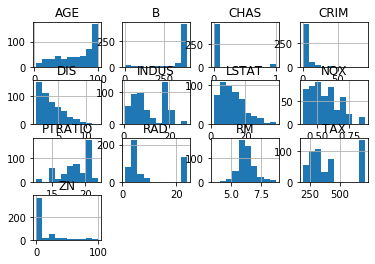

In [219]:
#Plot histograms of different variables
df.hist();

[Text(0, 0, 'CRIM'),
 Text(0, 0, 'ZN'),
 Text(0, 0, 'INDUS'),
 Text(0, 0, 'CHAS'),
 Text(0, 0, 'NOX'),
 Text(0, 0, 'RM'),
 Text(0, 0, 'AGE'),
 Text(0, 0, 'DIS'),
 Text(0, 0, 'RAD'),
 Text(0, 0, 'TAX'),
 Text(0, 0, 'PTRATIO'),
 Text(0, 0, 'B'),
 Text(0, 0, 'LSTAT')]

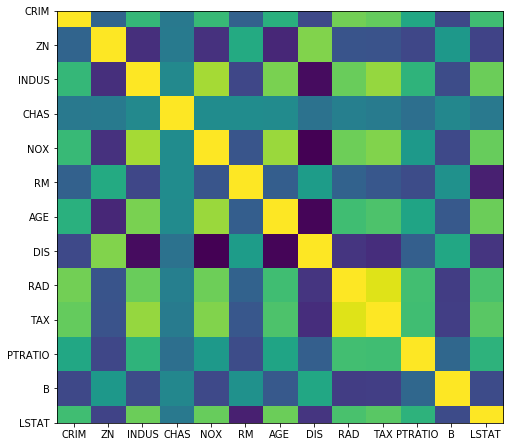

In [7]:
#Compute the correlations between variables
corrMatrix = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(8 ,8)
ax.imshow(corrMatrix)
features = df.columns
ax.set_xticks(np.arange(len(features)))
ax.set_yticks(np.arange(len(features)))
ax.set_xticklabels(features)
ax.set_yticklabels(features)
#ax.colorbar()

In [216]:
#Fit OLS linear model to crime data
res = sm.OLS(y,df['CRIM']).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.050
Model:                            OLS   Adj. R-squared (uncentered):              0.048
Method:                 Least Squares   F-statistic:                              26.63
Date:                Fri, 11 Sep 2020   Prob (F-statistic):                    3.56e-07
Time:                        14:42:42   Log-Likelihood:                         -2320.1
No. Observations:                 506   AIC:                                      4642.
Df Residuals:                     505   BIC:                                      4646.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [209]:
#Fit a linear model to all the data. We'll add a constant feature to add an intercept.
df['constant'] = [1]*506
res = sm.OLS(y,df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          6.72e-135
Time:                        14:41:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1080      0.033     -3.287      0.0

In [185]:
#Make a data matrix containing the CRIM data, its square, and cubes
X = np.zeros((506,3))
X[:,0] = df['CRIM'].values
X[:,1] = X[:,0]**2
X[:,2] = X[:,0]**3

In [186]:
#Fit degree 3 polynomial to CRIME data
res = sm.OLS(y,X).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.145
Model:                            OLS   Adj. R-squared (uncentered):              0.140
Method:                 Least Squares   F-statistic:                              28.45
Date:                Fri, 11 Sep 2020   Prob (F-statistic):                    5.24e-17
Time:                        14:26:36   Log-Likelihood:                         -2293.4
No. Observations:                 506   AIC:                                      4593.
Df Residuals:                     503   BIC:                                      4606.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [187]:
#Challenge 1: how do coeffs. and p-values for each feature, regressed separately, compare to the coeffs. and p-values
#in the multiple regression? Explain what you find.

In [188]:
#Challenge 2: Propose some interaction terms and add them to the model. Do you reject the null hypothesis, that the coeff.
#of interaction is 0?

In [241]:
#Challenge 3: We can compute the VIF of our features as follows. Propose a simpler model with fewer features,
# and compare the results.
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = pd.DataFrame(dataset.data, columns=dataset.feature_names).to_numpy()
vif = [variance_inflation_factor(data, i) for i in range(data.shape[1])]
for i in range(13):
    print("VIF of " + df.columns[i] + ": " + str(vif[i]))

VIF of CRIM: 2.1003728199615233
VIF of ZN: 2.8440132669462646
VIF of INDUS: 14.485757706539331
VIF of CHAS: 1.1529518589418777
VIF of NOX: 73.89494652814788
VIF of RM: 77.94828304638538
VIF of AGE: 21.38685048994314
VIF of DIS: 14.6996523837492
VIF of RAD: 15.167724857920897
VIF of TAX: 61.227274009649456
VIF of PTRATIO: 85.02954731061801
VIF of B: 20.10494263622909
VIF of LSTAT: 11.102024772203539
